In [7]:
from toolbox import dB2lin, dBm2watts, get_angle, watts2dBm, pack2dict
from mlxtend.plotting import heatmap
from collections import Counter
import numpy as np
import pandas as pd
from antenna import AntennaArray
import seaborn as sns 
import matplotlib.pyplot as plt
import optimizers
import simulation
import math

In [8]:

from numpy import argmax, maximum, rad2deg

def calc_prx(Cd, w_bs2ue):
    '''
    This returns the received power in watts.
    '''
    # Don't ask me why this is the conjugate. It just works as in the 
    #   reference MATLAB code.
    psi = np.conj(np.matmul(Cd.T, w_bs2ue))
    # Don't ask me why this is the conjugate. It just works as in the 
    #   reference MATLAB code.
    D=0
    prx = np.power(np.linalg.norm(D+psi), 2)
    return prx

#def simulationAdrian(Ptx_dBm, bs_loc, ue_loc, alpha_bs2ue,A_dB):
A_dB = -30
_bs_loc = np.array([0, 0, 0])  # Base station.
_ue_loc = np.array([50, 0, 0])  # User equipment.
_Ptx_dBm = 25

_fc = 30e9  # Carrier frequency.
element_gain_dbi = 1 #Antenna element gain
_wavelen = 3e8/_fc  # Wavelength of the 30 GHz carrier frequency.
_nx, _ny, _nz = 1, 8, 8
_M = int(_nx*_ny*_nz)
_dx = _dy = _dz =_wavelen * 0.5
nhbeams = 9
nvbeams = 7
hangmin, hangmax = -45, 45 #vertical angles
vangmin, vangmax = -35, 35 #vertical angles
_bs_antenna = AntennaArray(
        _wavelen, _nx, _ny, _nz, _dx, _dy, _dz, hbeams = nhbeams, vbeams = nvbeams, 
            hangmin = hangmin, hangmax = hangmax, vangmin = vangmin, vangmax = vangmax)
nbits = 4
    ###########################################################
alpha_bs2ue  = 3.5 # ... between BS and user equipment.
d_bs2ue  = np.linalg.norm(_bs_loc-_ue_loc)
# Path loss coefficient.
A = dB2lin(A_dB)
# Transmit power.
p = np.sqrt(dBm2watts(_Ptx_dBm)/_M) * np.ones((_M, 1)) # Transmit power per element.
# Channels.
# Direct channel, BS -> UE.


cd = np.sqrt(A*np.power(d_bs2ue, -alpha_bs2ue)/2.)*simulation.gen_fading(_M,1)#np.ones((M, 1))#(np.random.randn(M, 1) + 1j*np.random.randn(M, 1))


# Beam sweeping.\
logs = {"prx_dBm": [], "phi": [], "steering_angle": []}
gain = []
phis = np.linspace(-np.pi/2, np.pi/2, 200) # Horizontal angles.
count = 0
rsrp = []
sigstrengthvalues = []
for codebook_id in _bs_antenna.codebook_ids:
    w_steer, steering_angle = _bs_antenna.steering_vec(codebook_id)
    print(steering_angle, codebook_id)
    w_steer = w_steer.conj()
    
    element_gain = 10*np.power(10, element_gain_dbi/10) # dBi -> linear.
    m = int(_nx*_ny*_nz) # Number of antenna elements.
    p = np.sqrt(dBm2watts(_Ptx_dBm)/m) * np.ones((m, 1)) * element_gain # Power spread over antenna elements.
    w = _bs_antenna.calc_array_factor( # Radiation pattern.
            theta=np.pi/2, phi=0
        )
    w = w @ w_steer
    w = np.multiply(w, p)
    g = np.power(np.linalg.norm(np.sum(w)), 2) # Gain.
    gain = 10*np.log10(g)
    w_bs2ue = np.multiply(p, g)
        
    prx = calc_prx(cd, w_bs2ue)
    prx_dBm = watts2dBm(prx)
    sigstrengthvalues = np.append(sigstrengthvalues, prx_dBm + 0.001)
    rsrp = max(sigstrengthvalues)

print(rsrp)
print(sigstrengthvalues)

    #return sigstrengthvalues, logs    

(55.0, -45.0) 0
(55.0, -33.75) 1
(55.0, -22.5) 2
(55.0, -11.25) 3
(55.0, 0.0) 4
(55.0, 11.25) 5
(55.0, 22.5) 6
(55.0, 33.75) 7
(55.0, 45.0) 8
(66.66666666666666, -45.0) 9
(66.66666666666666, -33.75) 10
(66.66666666666666, -22.5) 11
(66.66666666666666, -11.25) 12
(66.66666666666666, 0.0) 13
(66.66666666666666, 11.25) 14
(66.66666666666666, 22.5) 15
(66.66666666666666, 33.75) 16
(66.66666666666666, 45.0) 17
(78.33333333333333, -45.0) 18
(78.33333333333333, -33.75) 19
(78.33333333333333, -22.5) 20
(78.33333333333333, -11.25) 21
(78.33333333333333, 0.0) 22
(78.33333333333333, 11.25) 23
(78.33333333333333, 22.5) 24
(78.33333333333333, 33.75) 25
(78.33333333333333, 45.0) 26
(90.0, -45.0) 27
(90.0, -33.75) 28
(90.0, -22.5) 29
(90.0, -11.25) 30
(90.0, 0.0) 31
(90.0, 11.25) 32
(90.0, 22.5) 33
(90.0, 33.75) 34
(90.0, 45.0) 35
(101.66666666666666, -45.0) 36
(101.66666666666666, -33.75) 37
(101.66666666666666, -22.5) 38
(101.66666666666666, -11.25) 39
(101.66666666666666, 0.0) 40
(101.666666666666

In [9]:
matrix2d = np.reshape(sigstrengthvalues, (7,9))
rsrp = max(k for k,v in Counter(sigstrengthvalues).items() if v>1)
print (np.where(rsrp))

(array([0]),)


In [10]:
matrix2d = np.reshape(sigstrengthvalues, (7,9))
nrow, ncol = matrix2d.shape
i = np.argmax(matrix2d) 
rid = i//ncol 
cid = i%ncol
(rid, cid)

(3, 4)

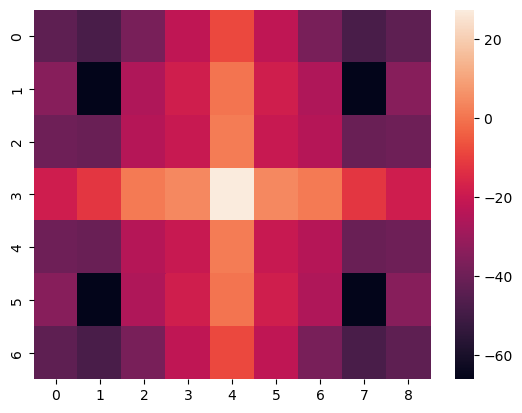

In [11]:

#print(matrix2d)
sns.heatmap(matrix2d)